In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
import random 

# 1. Preparing a dataset

In [3]:
rangeData=20
lenData =1000
testProportion = 0.3 
testEnd = round(lenData * testProportion)

Now generate a random number 

In [4]:
dataIn = np.random.randint(-rangeData,rangeData+1,size=(lenData,2))

print(dataIn)

[[ -5  -6]
 [ -8  -7]
 [  6  15]
 ...
 [ 10   9]
 [  5  20]
 [ -6 -11]]


In [5]:
dataOut=dataIn[:,0] + dataIn[:,1]

print(dataOut)

[-11 -15  21  -2 -16   5  18  -4  12 -11 -23   6 -13 -18 -16  -5  11  13
  22 -26 -27  13  10  10 -11 -26  -1   8 -18 -19 -19  -1  24  -2  38  -7
 -10  13   3 -32  10   3   5  -4 -19  23  -1 -10  -5  16 -30  14  12  11
  22 -12  19  28 -12 -10  -2 -19 -25  29  16   5  29 -10   5   7   7   7
   8   1   8  30  11  -1  28   6 -12   3   3  -9   1 -26 -28 -33  20  -7
 -16   2 -30 -13  14   7  29  -1 -14   7   1 -11 -36  24  23   7   8 -19
   1  -3 -31  -5  33 -28  19   8  28  -5 -23   7 -31   0 -28   6   3  17
  35  17  13  -1  -5  -3 -17 -22 -29  31  -6  16  -6 -13 -20 -21 -17 -24
  -2 -24   9   6  -6 -17  -3  31 -35  -5 -16 -11  29 -23  31   9  15   0
  25  10 -20  -3   9  29  -1  12  -2   8 -11 -18  -6  -8  -9 -11  14   4
  -3  11  -9   6   5  -4  -3  -1  39   1  29  15 -25  28  -1 -18  13  23
 -10 -10  12  -1  23 -17   1  11 -23   5  19 -40 -30  30  -2  15  10   2
 -12   9  19  13  29  16   4 -21  32 -18 -15  -4 -14   3 -17  -6   7   5
  13  15 -20 -19   7  14   1 -18 -11   2  16  14 -3

In [6]:
# It creates a column vector of ones: np.ones([lenData, 1])

# Then it horizontally concatenates this with dataIn:


dataIn = np.concatenate( [     np.ones([lenData,1])   ,
                               dataIn
                         ] , 
                          axis=1
                        )

# dataIn = np.concatenate([np.ones([lenData,1]), dataIn], axis=1) 

In NumPy:

axis=0 refers to rows (vertical stacking)

axis=1 refers to columns (horizontal stacking)



In [7]:
a = np.array([[1, 2],
              [3, 4]])

b = np.array([[5],
              [6]])

np.concatenate([a, b], axis=1)
               

array([[1, 2, 5],
       [3, 4, 6]])

Now, making the final dataset. 

In [8]:
print(testEnd)
print(f"Testing = 0 : {testEnd} and training is {testEnd+1} : {lenData}")
print(f"Also we have Input and Output : in Testing and Training ")
print("-----------------")
print(f"Normally 70% in training and 30% in testing")

testingIn = dataIn[0:testEnd]
testingOut = dataOut[0:testEnd]

trainingIn = dataIn[testEnd:]
trainingOut=dataOut[testEnd:]

300
Testing = 0 : 300 and training is 301 : 1000
Also we have Input and Output : in Testing and Training 
-----------------
Normally 70% in training and 30% in testing


In [9]:
print(testingIn[0])
print(testingOut[0])

print(trainingIn[0])
print(trainingOut[0])



[ 1. -5. -6.]
-11
[  1.   0. -14.]
-14


# 2. Setting up Neural Network 

In [10]:
# Only one input layer ----> Length = 3 (1 bias + 2 numbers )
# Output layer lenth = 1 (result)

# setting a random weight in the range of -2 to 2 
weights = 4*np.random.rand(3)-2

print(weights)

[-0.2769033  -1.75657219 -0.80155973]


In [11]:
# No need of activation function

# Output of neural network is DOT PRODUCT of two vectors. 

def calculateOut(x,w): 
    # x = input 
    # w = weights
    return np.dot(x,w)

In [12]:
testIndex=10

calculateOut(trainingIn[testIndex] , weights)

-11.771348918645202

In [13]:
print(trainingIn[testIndex])
one = trainingIn[testIndex]

print(weights)
two = weights

print(np.dot(one,two))


[ 1.  7. -1.]
[-0.2769033  -1.75657219 -0.80155973]
-11.771348918645202


In [14]:
# Since we are giving only index, so we need to check everything as our output matches or not 
# 
calculateOut(testingIn,weights) 

array([ 13.31531606,  19.38659237, -22.83973247,  16.6064155 ,
        23.05318949,   9.08547245, -31.89520277,   9.61442284,
       -18.49073224,  -0.05485836,  29.61912008, -10.81633646,
         8.23334832,  25.61132141,  29.7382767 ,  -5.81922922,
       -11.95909775,  -8.78715493, -27.46134204,  32.97881174,
        29.96032164,  -9.74216739, -17.84262523, -16.88761277,
        17.1353659 ,  39.66389895,  -2.34038095, -23.87960543,
        18.9262342 ,  17.81776902,  15.9077441 ,  16.75986823,
       -28.10944905,  -9.17892088, -47.92639745,  13.92912696,
        20.153856  ,  -5.92211755,  -7.4566448 ,  41.60821998,
         0.30261148,   4.95851716, -12.8798141 ,   8.65941038,
        32.1429559 , -23.48783948,   9.11976856,   2.96363174,
        -1.04416693, -22.65198363,  39.05008805, -26.77893892,
        -9.89562011, -18.64418496, -21.73126729,   1.70171383,
       -31.74175005, -34.18072536,   5.52176367,  20.153856  ,
        18.51644042,  20.68280639,  27.40218971, -32.11

In [15]:
# Testing the accuracy 

# For that , we only aim to calculated how many is correct ; 

# If TestingOutput - CalculateOutput = 0 ; Then it is correct
# Else the calculation is incorrect 

# So,  (TestingOutput - CalculateOutput) > o ----Then represent is as +1 
# And
# So,  (TestingOutput - CalculateOutput) < o ----Then represent is as -1 

# Then we will get the output as -1 , -1 , 1 , 0 , 1, 1 like this 

# Since all +1 and -1 are the incorrect values; else we would have got (0)

# Therefore, makking all error as (1) and correct as (0). And on calculating total, we would get the total incorrect values 




In [16]:
testingOut-calculateOut(testingIn,weights)
np.round(testingOut-calculateOut(testingIn,weights))
np.sign(np.round(testingOut-calculateOut(testingIn,weights)))
np.abs(np.sign(np.round(testingOut-calculateOut(testingIn,weights))))
np.sum(np.abs(np.sign(np.round(testingOut-calculateOut(testingIn,weights)))))

np.sum(np.abs(np.sign(np.round(testingOut-calculateOut(testingIn,weights))))) / testEnd

1- np.sum(np.abs(np.sign(np.round(testingOut-calculateOut(testingIn,weights))))) / testEnd


0.01666666666666672

In [17]:
def manual_accuracy(testingIn, testingOut, weights):
    predictions = calculateOut(testingIn, weights)
    error = testingOut - predictions
    
    # Convert error to 1 or -1 based on sign
    for i in range(len(error)):
        if error[i] > 0:
            error[i] = 1
        elif error[i] < 0:
            error[i] = -1
        else:
            error[i] = 0  # optional: handle case where prediction == actual
    
    # Count correct predictions (i.e., where error == 0)
    correct = 0
    for i in range(len(error)):
        if error[i] == 0:
            correct += 1
    
    # Calculate accuracy as a percentage
    return correct / len(error)

In [18]:
def accuracy(testingIn,testingOut,weights): 
    return 1-np.sum(np.abs(np.sign(np.round(testingOut-calculateOut(testingIn,weights))))) / testEnd


In [19]:
accuracy(testingIn,testingOut,weights)

0.01666666666666672

### Now, for the neural network, the accuracy means how much it is write or wrong; 

But this means nothing for  the learining. Only the error helps in learning  

So with the help of error function, we can improve the network. 

### Error

In [20]:
def error(predictedValues,corectValues): 
    return np.sum((predictedValues-corectValues)**2)

In [21]:
# error(calculateOut,testingOut)

# error(calculateOut(trainingIn,weights),trainingOut)

error(calculateOut(trainingIn[testIndex],weights),trainingOut[testIndex])

315.820842388232

#### Accuracy is used with the testing Dataset 

while

#### Error is used with the training dataset

-------------------------------

# Now with the error minimization 

## Gradient of Error 

In [22]:
def gradientSlow(x,w,correctValues): 
    return np.array([  2 * (calculateOut(x,w) - correctValues) * x[indexWeight] for indexWeight in range(3) ])

In [23]:
gradientSlow(trainingIn[testIndex],weights,testingOut[testIndex])

# it is giving three output of weights : w1, w2 and w3

array([ 22.45730216, 157.20111514, -22.45730216])

In [24]:
def gradient(x,w,correctValues): 
    return 2 * (calculateOut(x,w) - correctValues) * x

In [25]:
gradient(trainingIn[testIndex],weights,testingOut[testIndex])

array([ 22.45730216, 157.20111514, -22.45730216])

## Learning Rate

In [26]:
iterations = 100000

learningRate = 0.0001

# weights = weights - learningRate * gradient()


# For documentation ; making a list 
errorlist = [error(calculateOut(trainingIn[testIndex],weights) , trainingOut[testIndex] )]
weight_list = [weights]


In [27]:
for i in range(iterations): 
    # pick random input
    index = np.random.randint(lenData-testEnd)
    # update weight 
    weights = weights - learningRate * gradient(trainingIn[index],weights,trainingOut[index])
    weight_list.append(weights)
    # Calculate error 
    er = (error(calculateOut(trainingIn[index],weights),trainingOut[index]))
    errorlist.append(er)

In [28]:
errorlist

[315.820842388232,
 518.1792001346853,
 4750.934483074319,
 896.6774794212665,
 408.1249681440157,
 2237.57616025153,
 53.49986955008886,
 648.2500240443367,
 3180.104285453929,
 278.2280542671019,
 77.35380806959002,
 118.74050431240813,
 209.78873866595575,
 136.45534070745117,
 833.7499367590063,
 3.3402347960360705,
 237.73788471825384,
 1864.9275994191519,
 995.6070716746941,
 556.596516085255,
 2.687690147294702,
 994.9129282477743,
 270.74256282299393,
 9.975395088293801,
 5.882393809266465,
 101.12844128521463,
 191.5436318444525,
 84.12325658872653,
 41.781627129805486,
 40.995575991693926,
 51.795001884338205,
 227.59709808343936,
 700.0548308401964,
 152.16615420259467,
 297.8817749067755,
 156.63296637993423,
 84.28725511849161,
 3.3560036255355654,
 45.623476240708456,
 12.995061579678142,
 1.2818258527253135,
 38.079272518928136,
 23.736956802853587,
 3.200336098018333,
 0.6945041101482481,
 39.40767185025295,
 4.880661236200896,
 0.2951393917012479,
 6.91105815519295,
 8

In [29]:
weight_list

[array([-0.2769033 , -1.75657219, -0.80155973]),
 array([-0.28155367, -1.74727146, -0.75505606]),
 array([-0.26583844, -1.48011245, -0.47218182]),
 array([-0.25941394, -1.37089603, -0.51715329]),
 array([-0.25515099, -1.31121478, -0.55125686]),
 array([-0.26545891, -1.19782771, -0.37602229]),
 array([-0.26391514, -1.2070903 , -0.35286581]),
 array([-0.26915938, -1.1441595 , -0.35286581]),
 array([-0.25608742, -0.89579235, -0.11757062]),
 array([-0.25271155, -0.87216127, -0.10744302]),
 array([-0.2546227 , -0.88362816, -0.07113121]),
 array([-0.25237779, -0.88587307, -0.04419224]),
 array([-0.25539154, -0.84970806, -0.0652885 ]),
 array([-0.25299683, -0.84970806, -0.03894666]),
 array([-0.24686501, -0.74546717, -0.04507847]),
 array([-0.24723807, -0.74322879, -0.04806297]),
 array([-0.24398448, -0.69767857, -0.07409167]),
 array([-0.25400416, -0.52734406,  0.12630187]),
 array([-0.24718773, -0.4114648 ,  0.18764971]),
 array([-0.24216061, -0.36622067,  0.26305659]),
 array([-0.24248974,

In [30]:
print(weights)
print(er)

[-5.38857708e-10  1.00000000e+00  1.00000000e+00]
1.8418196179133608e-19


In [31]:
print(len(errorlist))

100001


# Plotting the plot of error (convergence rate)

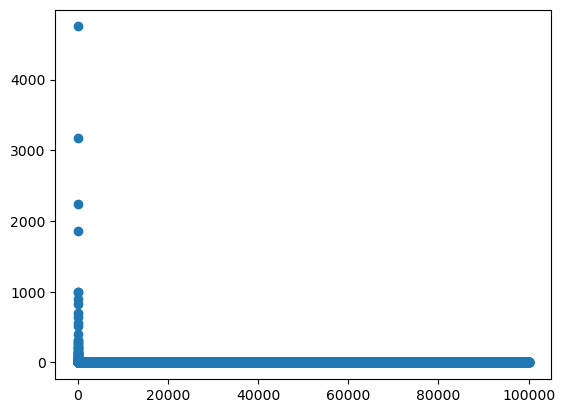

In [32]:
plt.scatter(range(iterations+1),errorlist)

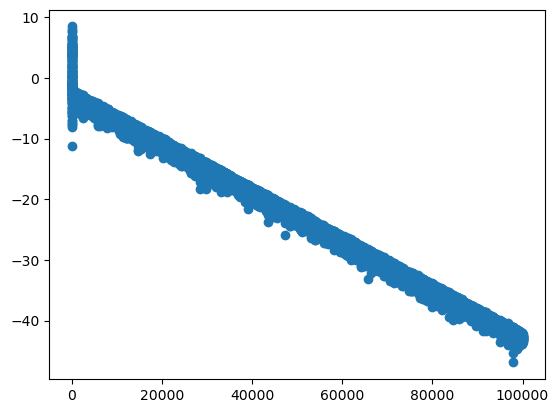

In [33]:
plt.scatter(range(iterations+1),np.log(errorlist))

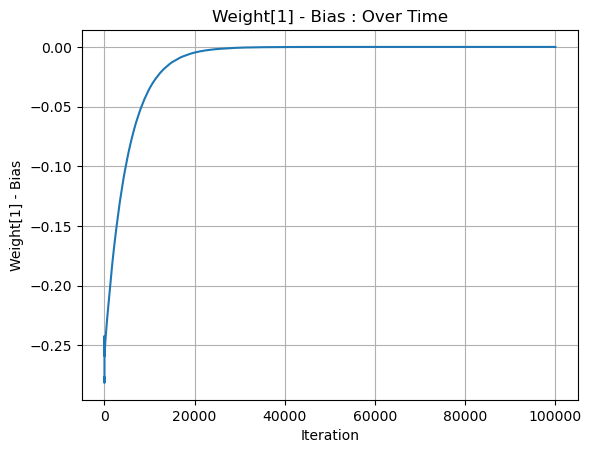

In [42]:
weights_array = np.array(weight_list)  # shape: (iterations+1, num_weights)
plt.plot(range(len(weights_array)), weights_array[:, 0])  # first weight
plt.xlabel("Iteration")
plt.ylabel("Weight[1] - Bias")
plt.title("Weight[1] - Bias : Over Time")
plt.grid(True)
plt.show()

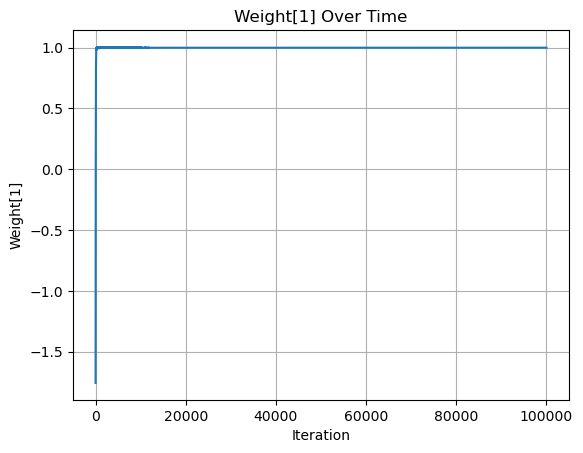

In [38]:
weights_array = np.array(weight_list)  # shape: (iterations+1, num_weights)
plt.plot(range(len(weights_array)), weights_array[:, 1])  # second weight
plt.xlabel("Iteration")
plt.ylabel("Weight[1]")
plt.title("Weight[1] Over Time")
plt.grid(True)
plt.show()

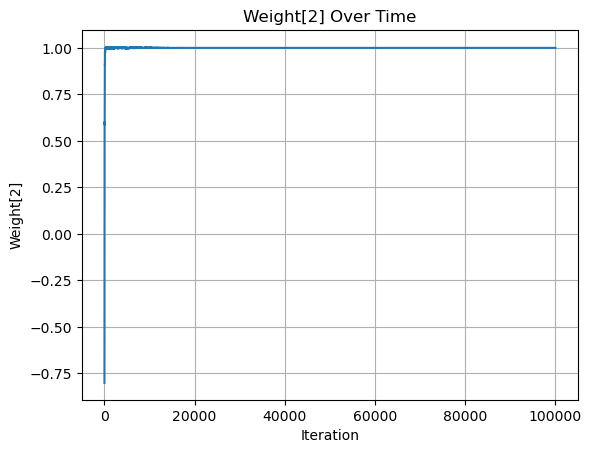

In [39]:
weights_array = np.array(weight_list)  # shape: (iterations+1, num_weights)
plt.plot(range(len(weights_array)), weights_array[:, 2])  # third weight
plt.xlabel("Iteration")
plt.ylabel("Weight[2]")
plt.title("Weight[2] Over Time")
plt.grid(True)
plt.show()

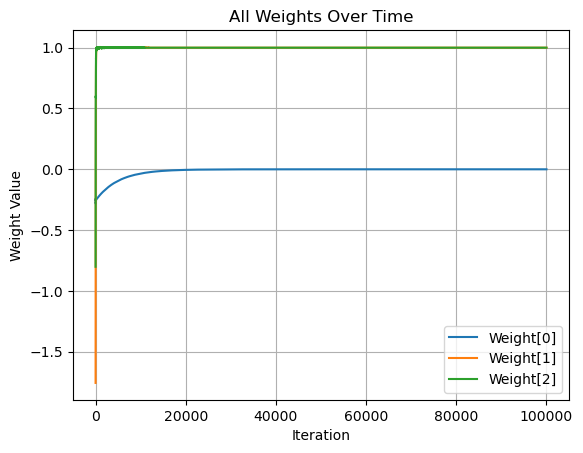

In [40]:
for i in range(weights_array.shape[1]):
    plt.plot(weights_array[:, i], label=f'Weight[{i}]')

plt.xlabel("Iteration")
plt.ylabel("Weight Value")
plt.title("All Weights Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Now what to do with those 300 testing dataset? 

Those 300 datasets are quite untouched so far

So, the network does not know this dataset, and this network has not learned from this (testing) dataset. 

Now, it is a good dataset (testing) to verify that the network has actually learned and that it has not just memorized the input data from the trainingg. 

But that it can also apply its capabilities to a new testing dataset. 

In [43]:
testingOut

array([-11, -15,  21,  -2, -16,   5,  18,  -4,  12, -11, -23,   6, -13,
       -18, -16,  -5,  11,  13,  22, -26, -27,  13,  10,  10, -11, -26,
        -1,   8, -18, -19, -19,  -1,  24,  -2,  38,  -7, -10,  13,   3,
       -32,  10,   3,   5,  -4, -19,  23,  -1, -10,  -5,  16, -30,  14,
        12,  11,  22, -12,  19,  28, -12, -10,  -2, -19, -25,  29,  16,
         5,  29, -10,   5,   7,   7,   7,   8,   1,   8,  30,  11,  -1,
        28,   6, -12,   3,   3,  -9,   1, -26, -28, -33,  20,  -7, -16,
         2, -30, -13,  14,   7,  29,  -1, -14,   7,   1, -11, -36,  24,
        23,   7,   8, -19,   1,  -3, -31,  -5,  33, -28,  19,   8,  28,
        -5, -23,   7, -31,   0, -28,   6,   3,  17,  35,  17,  13,  -1,
        -5,  -3, -17, -22, -29,  31,  -6,  16,  -6, -13, -20, -21, -17,
       -24,  -2, -24,   9,   6,  -6, -17,  -3,  31, -35,  -5, -16, -11,
        29, -23,  31,   9,  15,   0,  25,  10, -20,  -3,   9,  29,  -1,
        12,  -2,   8, -11, -18,  -6,  -8,  -9, -11,  14,   4,  -

# This is what we want to receive from our network

In [45]:
calculateOut(testingIn,weights)

np.round(calculateOut(testingIn,weights))

array([-11., -15.,  21.,  -2., -16.,   5.,  18.,  -4.,  12., -11., -23.,
         6., -13., -18., -16.,  -5.,  11.,  13.,  22., -26., -27.,  13.,
        10.,  10., -11., -26.,  -1.,   8., -18., -19., -19.,  -1.,  24.,
        -2.,  38.,  -7., -10.,  13.,   3., -32.,  10.,   3.,   5.,  -4.,
       -19.,  23.,  -1., -10.,  -5.,  16., -30.,  14.,  12.,  11.,  22.,
       -12.,  19.,  28., -12., -10.,  -2., -19., -25.,  29.,  16.,   5.,
        29., -10.,   5.,   7.,   7.,   7.,   8.,   1.,   8.,  30.,  11.,
        -1.,  28.,   6., -12.,   3.,   3.,  -9.,   1., -26., -28., -33.,
        20.,  -7., -16.,   2., -30., -13.,  14.,   7.,  29.,  -1., -14.,
         7.,   1., -11., -36.,  24.,  23.,   7.,   8., -19.,   1.,  -3.,
       -31.,  -5.,  33., -28.,  19.,   8.,  28.,  -5., -23.,   7., -31.,
        -0., -28.,   6.,   3.,  17.,  35.,  17.,  13.,  -1.,  -5.,  -3.,
       -17., -22., -29.,  31.,  -6.,  16.,  -6., -13., -20., -21., -17.,
       -24.,  -2., -24.,   9.,   6.,  -6., -17.,  -

# Now check the accuracy

In [47]:
accuracy(testingIn,testingOut,weights)

# previously on the top, the accuracy was 0.01666666666666672

1.0

Now its 100% perfect of time . 

It is able to predict all 300 out of 300 perfectly. 

These dataset(testing) was not seen by the network but now did task ; very correctly. 

# Now you can check (or perform addition with the neural network)

In [48]:
calculateOut([50, 90,90 ],weights)

179.99999997372225

In [52]:
np.round(calculateOut([50, 170,90 ],weights))

260.0